Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9110 - loss: 0.1954 - val_accuracy: 0.9760 - val_loss: 0.0528
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9709 - loss: 0.0665 - val_accuracy: 0.9856 - val_loss: 0.0361
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9826 - loss: 0.0424 - val_accuracy: 0.9930 - val_loss: 0.0195
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9869 - loss: 0.0310 - val_accuracy: 0.9942 - val_loss: 0.0148
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9888 - loss: 0.0256 - val_accuracy: 0.9919 - val_loss: 0.0180
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9905 - loss: 0.0232 - val_accuracy: 0.9934 - val_loss: 0.0156
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0202 - val_accuracy: 0.9933 - val_loss: 0.0137
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9919 - loss: 0.0197 - val_accu

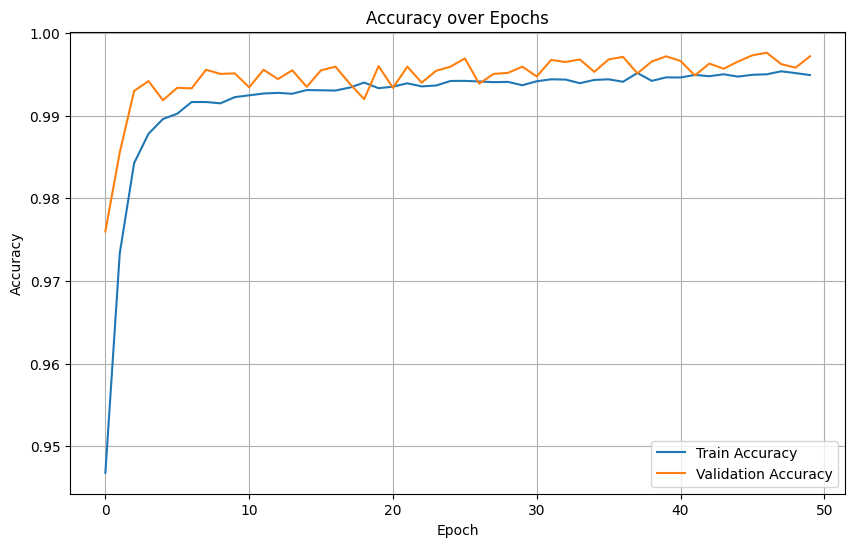

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('loan_eligibility_dataset new.csv')

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

# Split features and target
X = df.drop('Loan_Approval_Status', axis=1)  # Assuming 'Loan_Status' is the target
y = df['Loan_Approval_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build DenseNet-like model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

📊 Evaluation on Training Data of DenseNet with Adam:
Accuracy  : 0.9977
Precision : 0.9979
Recall    : 0.9984
F1 Score  : 0.9982
ROC-AUC   : 1.0000
Confusion Matrix:
[[28151   107]
 [   81 51661]]
TN: 28151, FP: 107, FN: 81, TP: 51661


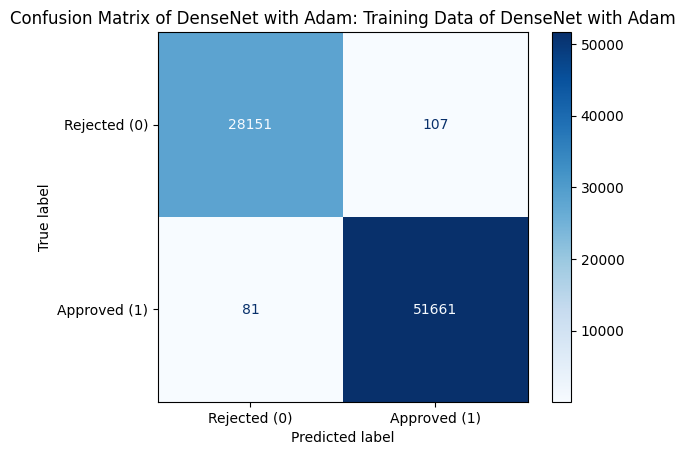

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Evaluation on Testing Data of DenseNet with Adam:
Accuracy  : 0.9963
Precision : 0.9968
Recall    : 0.9975
F1 Score  : 0.9971
ROC-AUC   : 1.0000
Confusion Matrix:
[[ 7007    42]
 [   32 12919]]
TN: 7007, FP: 42, FN: 32, TP: 12919


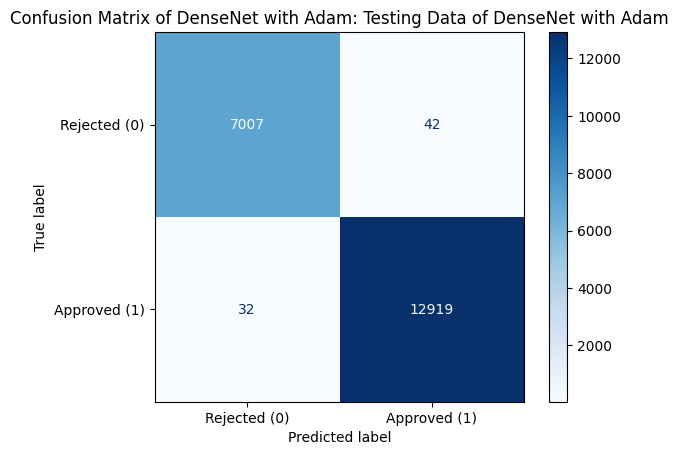

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of DenseNet with Adam: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(model, X_train, y_train, dataset_name="Training Data of DenseNet with Adam")

# Evaluate on Testing Data
evaluate_model(model, X_test, y_test, dataset_name="Testing Data of DenseNet with Adam")


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8943 - loss: 0.2145 - val_accuracy: 0.9707 - val_loss: 0.0642
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9693 - loss: 0.0714 - val_accuracy: 0.9833 - val_loss: 0.0391
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9772 - loss: 0.0544 - val_accuracy: 0.9826 - val_loss: 0.0378
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9808 - loss: 0.0440 - val_accuracy: 0.9874 - val_loss: 0.0289
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9830 - loss: 0.0386 - val_accuracy: 0.9866 - val_loss: 0.0308
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9844 - loss: 0.0357 - val_accuracy: 0.9906 - val_loss: 0.0230
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9857 - loss: 0.0334 - val_accuracy: 0.9855 - val_loss: 0.0295
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0316 - val_accur

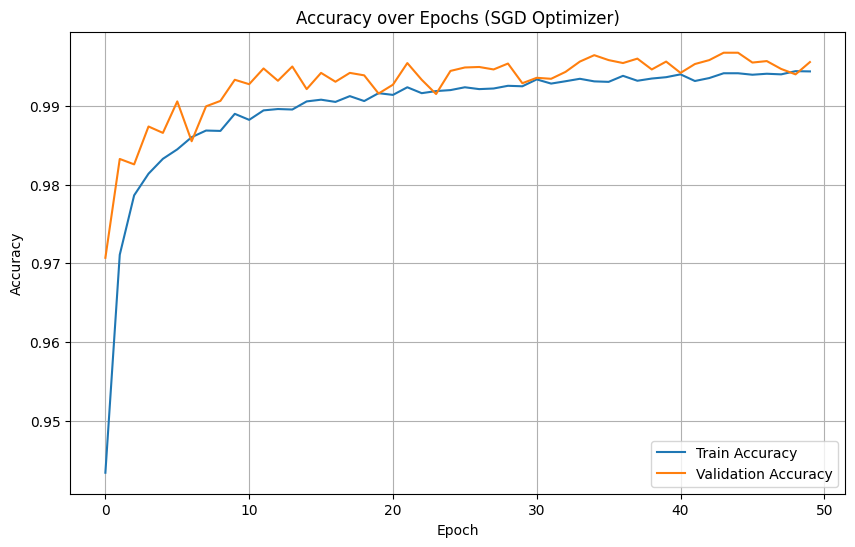

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('loan_eligibility_dataset new.csv')

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

# Split features and target
X = df.drop('Loan_Approval_Status', axis=1)  # Make sure column name matches your dataset
y = df['Loan_Approval_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build DenseNet-like model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model with SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs (SGD Optimizer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

📊 Evaluation on Training Data of DenseNet with SGD:
Accuracy  : 0.9962
Precision : 0.9949
Recall    : 0.9993
F1 Score  : 0.9971
ROC-AUC   : 1.0000
Confusion Matrix:
[[27994   264]
 [   36 51706]]
TN: 27994, FP: 264, FN: 36, TP: 51706


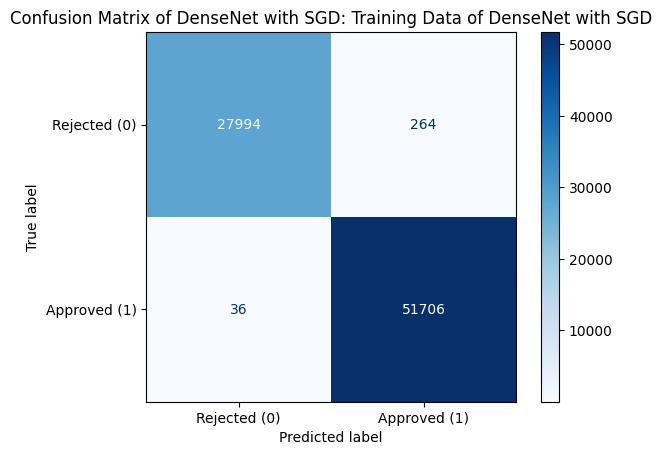

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

📊 Evaluation on Testing Data of DenseNet with SGD:
Accuracy  : 0.9957
Precision : 0.9945
Recall    : 0.9988
F1 Score  : 0.9966
ROC-AUC   : 1.0000
Confusion Matrix:
[[ 6978    71]
 [   16 12935]]
TN: 6978, FP: 71, FN: 16, TP: 12935


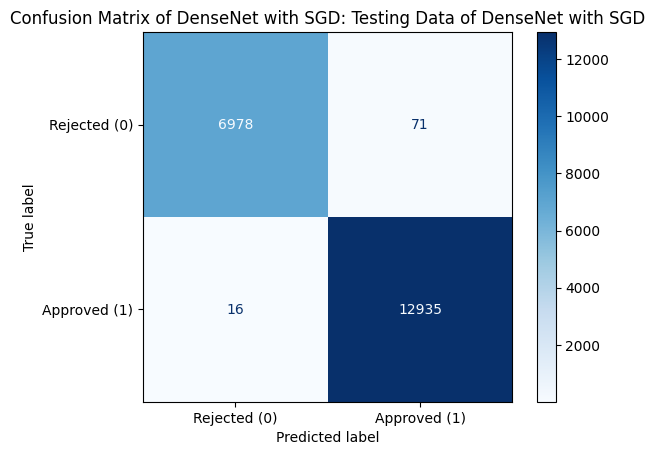

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of DenseNet with SGD: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(model, X_train, y_train, dataset_name="Training Data of DenseNet with SGD")

# Evaluate on Testing Data
evaluate_model(model, X_test, y_test, dataset_name="Testing Data of DenseNet with SGD")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9152 - loss: 0.1958 - val_accuracy: 0.9724 - val_loss: 0.0644
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9698 - loss: 0.0730 - val_accuracy: 0.9838 - val_loss: 0.0386
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9753 - loss: 0.0565 - val_accuracy: 0.9859 - val_loss: 0.0330
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9819 - loss: 0.0453 - val_accuracy: 0.9906 - val_loss: 0.0227
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9847 - loss: 0.0375 - val_accuracy: 0.9931 - val_loss: 0.0177
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9888 - loss: 0.0301 - val_accuracy: 0.9952 - val_loss: 0.0136
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9893 - loss: 0.0271 - val_accuracy: 0.9941 - val_loss: 0.0148
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9898 - loss: 0.0267 - val_ac

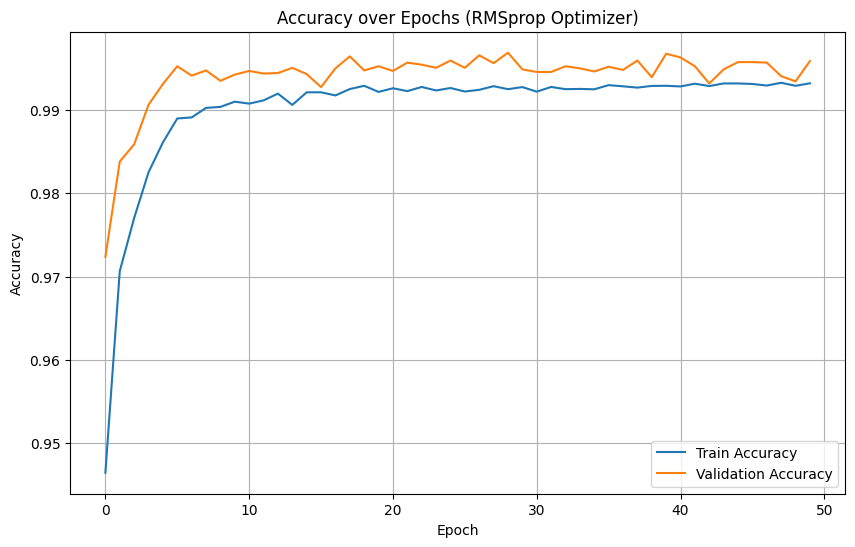

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('loan_eligibility_dataset new.csv')

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

# Split features and target
X = df.drop('Loan_Approval_Status', axis=1)  # Make sure column name matches your dataset
y = df['Loan_Approval_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build DenseNet-like model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model with RMSprop optimizer
rmsprop = RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs (RMSprop Optimizer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step

📊 Evaluation on Training Data of DenseNet with RMSprop:
Accuracy  : 0.9965
Precision : 0.9964
Recall    : 0.9982
F1 Score  : 0.9973
ROC-AUC   : 1.0000
Confusion Matrix:
[[28071   187]
 [   94 51648]]
TN: 28071, FP: 187, FN: 94, TP: 51648


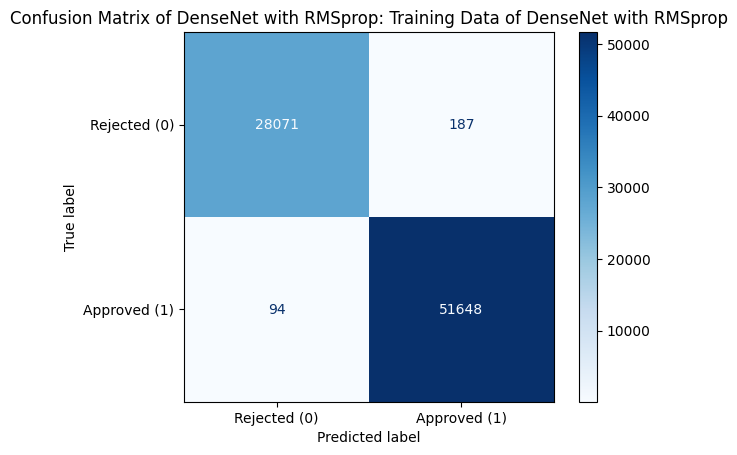

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Evaluation on Testing Data of DenseNet with RMSprop:
Accuracy  : 0.9959
Precision : 0.9961
Recall    : 0.9975
F1 Score  : 0.9968
ROC-AUC   : 0.9999
Confusion Matrix:
[[ 6999    50]
 [   32 12919]]
TN: 6999, FP: 50, FN: 32, TP: 12919


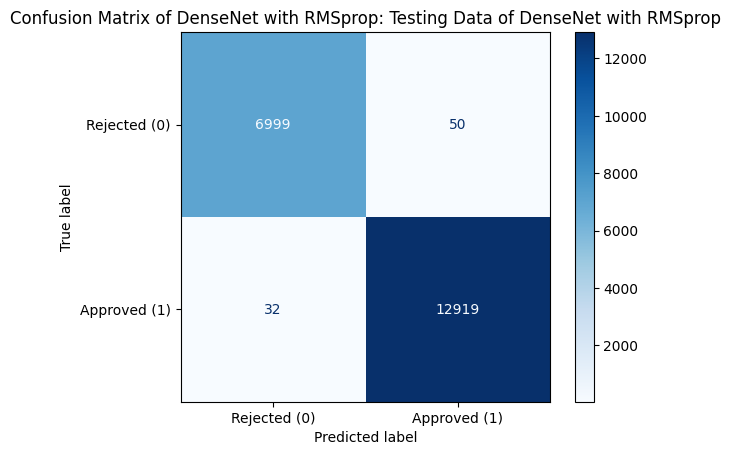

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of DenseNet with RMSprop: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(model, X_train, y_train, dataset_name="Training Data of DenseNet with RMSprop")

# Evaluate on Testing Data
evaluate_model(model, X_test, y_test, dataset_name="Testing Data of DenseNet with RMSprop")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8675 - loss: 0.2932 - val_accuracy: 0.9669 - val_loss: 0.1009
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9516 - loss: 0.1246 - val_accuracy: 0.9718 - val_loss: 0.0833
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9588 - loss: 0.1065 - val_accuracy: 0.9732 - val_loss: 0.0725
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9612 - loss: 0.0953 - val_accuracy: 0.9734 - val_loss: 0.0658
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9638 - loss: 0.0878 - val_accuracy: 0.9745 - val_loss: 0.0598
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9666 - loss: 0.0776 - val_accuracy: 0.9759 - val_loss: 0.0546
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9681 - loss: 0.0748 - val_accuracy: 0.9763 - val_loss: 0.0507
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9694 - loss: 0.0704 - val_ac

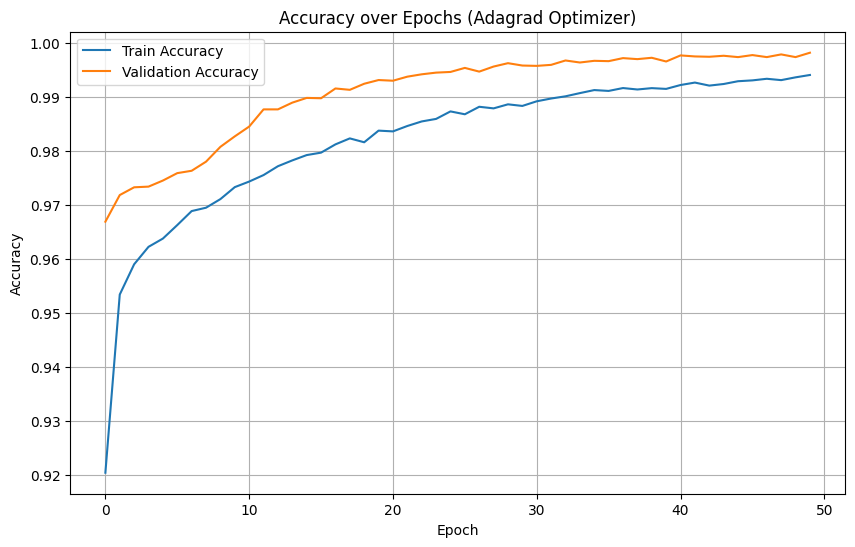

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adagrad
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('loan_eligibility_dataset new.csv')

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

# Split features and target
X = df.drop('Loan_Approval_Status', axis=1)  # Make sure column name matches your dataset
y = df['Loan_Approval_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build DenseNet-like model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model with Adagrad optimizer
adagrad = Adagrad(learning_rate=0.01)
model.compile(optimizer=adagrad, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs (Adagrad Optimizer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

📊 Evaluation on Training Data of DenseNet with Adagrad:
Accuracy  : 0.9984
Precision : 0.9987
Recall    : 0.9989
F1 Score  : 0.9988
ROC-AUC   : 1.0000
Confusion Matrix:
[[28191    67]
 [   59 51683]]
TN: 28191, FP: 67, FN: 59, TP: 51683


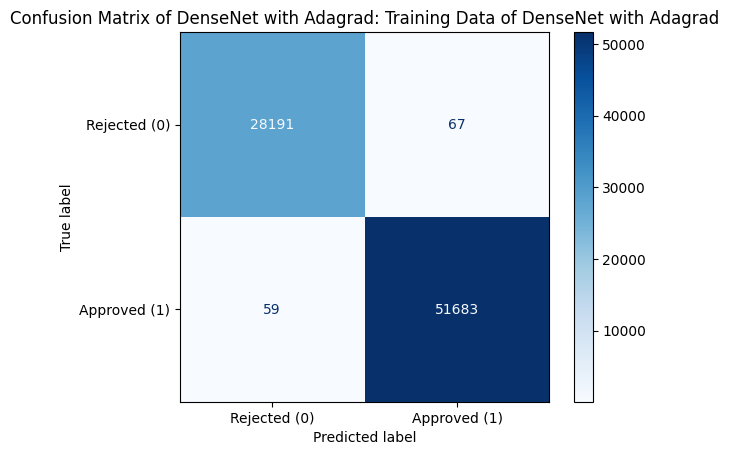

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Evaluation on Testing Data of DenseNet with Adagrad:
Accuracy  : 0.9974
Precision : 0.9978
Recall    : 0.9982
F1 Score  : 0.9980
ROC-AUC   : 1.0000
Confusion Matrix:
[[ 7021    28]
 [   23 12928]]
TN: 7021, FP: 28, FN: 23, TP: 12928


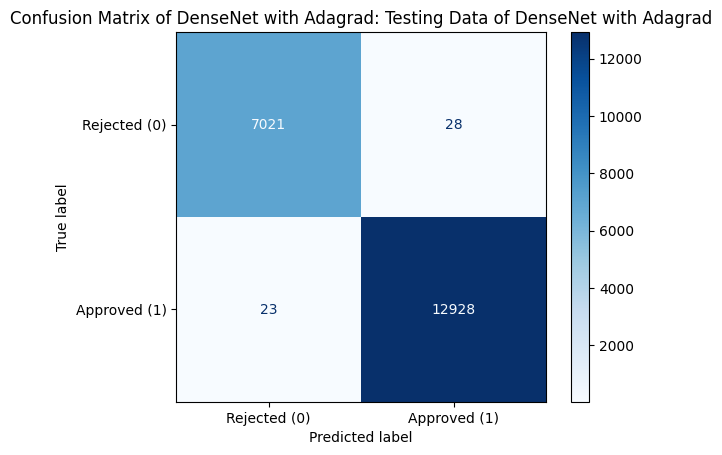

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of DenseNet with Adagrad: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(model, X_train, y_train, dataset_name="Training Data of DenseNet with Adagrad")

# Evaluate on Testing Data
evaluate_model(model, X_test, y_test, dataset_name="Testing Data of DenseNet with Adagrad")
